In [1]:
import numpy as np
import pandas as pd
import re
import codecs

from matplotlib import pyplot
from numpy import array
from pandas import DataFrame

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import RNN
from keras.layers import Lambda
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [4]:
jokertext = (open("text-data/data.txt").read())
jokertext = jokertext.lower()

characters = sorted(list(set(jokertext)))


n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

vocab_size = len(characters)
print('Number of unique characters: ', vocab_size)
print(characters)

X = []   # extracted sequences
Y = []   # the target - the follow up character
length = len(jokertext)
seq_length = 65   #number of characters to consider before predicting the following character
#get the number value for each char
for i in range(0, length - seq_length, 1):
    sequence = jokertext[i:i + seq_length]
    label = jokertext[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])
    
print('Number of extracted sequences:', len(X))
#change the shape so we can change the range to 0-1 to optimize for sigmoid
X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

X_modified.shape, Y_modified.shape

#initialize the keras LSTM model
model = Sequential()
model.add(LSTM(320, input_shape=(X_modified.shape[1],
             X_modified.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(320))
model.add(Dropout(0.2))
model.add(Dense(Y_modified.shape[1], activation='softmax'))
model.add(Lambda(lambda x: x ** 2)) #temp softmax


# load the network weights
#filename = "model-data/baseline-improvement-10-2.1320.hdf5"
#model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

filepath="model-data/baseline-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
print(model.summary())


Number of unique characters:  34
[' ', '!', '"', "'", ',', '-', '.', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of extracted sequences: 28252
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 65, 320)           412160    
_________________________________________________________________
dropout_5 (Dropout)          (None, 65, 320)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 320)               820480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 320)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 34)                10914     
___________

In [5]:
history = model.fit(X_modified, Y_modified, epochs=7, batch_size=128, callbacks = callbacks_list, validation_split=0.12)

Train on 24861 samples, validate on 3391 samples
Epoch 1/7
24861/24861 [==============================] - 392s 16ms/step - loss: 3.0152 - accuracy: 0.1938 - val_loss: 2.9593 - val_accuracy: 0.2070

Epoch 00001: loss improved from inf to 3.01517, saving model to model-data/baseline-improvement-01-3.0152.hdf5
Epoch 2/7
24861/24861 [==============================] - 322s 13ms/step - loss: 2.9693 - accuracy: 0.1949 - val_loss: 2.9093 - val_accuracy: 0.1920

Epoch 00002: loss improved from 3.01517 to 2.96932, saving model to model-data/baseline-improvement-02-2.9693.hdf5
Epoch 3/7
24861/24861 [==============================] - 293s 12ms/step - loss: 2.8822 - accuracy: 0.2080 - val_loss: 2.8067 - val_accuracy: 0.2262

Epoch 00003: loss improved from 2.96932 to 2.88218, saving model to model-data/baseline-improvement-03-2.8822.hdf5
Epoch 4/7
24861/24861 [==============================] - 286s 11ms/step - loss: 2.7880 - accuracy: 0.2277 - val_loss: 2.7251 - val_accuracy: 0.2445

Epoch 00004: l

In [ ]:
start = np.random.randint(0, len(X)-1) # or generate random start

string_mapped = list(X[start])

full_string = [n_to_char[value] for value in string_mapped]
#print(full_string)

print("Seed Text:")
print("\"", ''.join(full_string), "\"")

# generating characters
for i in range(130):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))

    pred_index = np.argmax(model.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])
    
    string_mapped.append(pred_index)  # add the predicted character to the end
    string_mapped = string_mapped[1:len(string_mapped)] # shift the string one character forward by removing pos. 0
    
    # combining text
txt=""
for char in full_string:
    txt = txt+char
    
#print(start)
print()
print(txt)

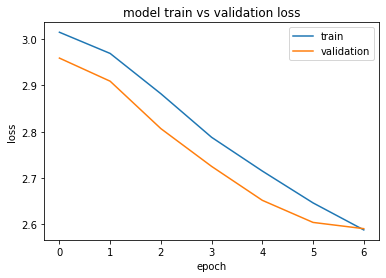

In [9]:

#diagnosis of keras run 
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [21]:
# GENERATE TEXT BASED ON EMOTIONS

sadtext = (open("text-data/sad.txt").read())
sadtext = sadtext.lower()

characters = sorted(list(set(sadtext)))

n_to_char = {n:char for n, char in enumerate(characters)}
char_to_n = {char:n for n, char in enumerate(characters)}

vocab_size = len(characters)
print('Number of unique characters: ', vocab_size)
print(characters)

X = []   # extracted sequences
Y = []   # the target - the follow up character
length = len(sadtext)
seq_length = 100   #number of characters to consider before predicting the following character

for i in range(0, length - seq_length, 1):
    sequence = sadtext[i:i + seq_length]
    label = sadtext[i + seq_length]
    X.append([char_to_n[char] for char in sequence])
    Y.append(char_to_n[label])
    
print('Number of extracted sequences:', len(X))

X_modified = np.reshape(X, (len(X), seq_length, 1))
X_modified = X_modified / float(len(characters))
Y_modified = np_utils.to_categorical(Y)

X_modified.shape, Y_modified.shape


modelS = Sequential()
modelS.add(LSTM(120, input_shape=(X_modified.shape[1],
             X_modified.shape[2]), return_sequences=True))
modelS.add(Dropout(0.2))
modelS.add(LSTM(120))
modelS.add(Dropout(0.2))
modelS.add(Dense(Y_modified.shape[1], activation='softmax'))
modelS.add(Lambda(lambda x: x ** 2)) #temp softmax


# load the network weights
#filename = "model-data/baseline-improvement-10-2.1320.hdf5"
#model.load_weights(filename)
modelS.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

filepath="model-data/baseline-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
print(modelS.summary())
historyS = modelS.fit(X_modified, Y_modified, epochs=5, batch_size=128, callbacks = callbacks_list, validation_split=0.12)

Number of unique characters:  35
['\n', ' ', '!', '"', "'", ',', '-', '.', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of extracted sequences: 56536
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 100, 120)          58560     
_________________________________________________________________
dropout_13 (Dropout)         (None, 100, 120)          0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 120)               115680    
_________________________________________________________________
dropout_14 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 35)                4235      
_____

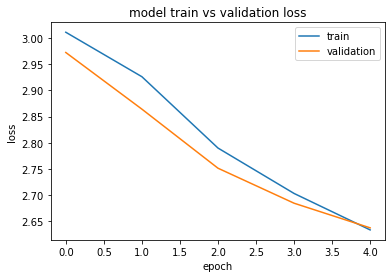

In [22]:
pyplot.plot(historyS.history['loss'])
pyplot.plot(historyS.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [23]:
start = np.random.randint(0, len(X)-1) # or generate random start

string_mapped = list(X[start])

full_string = [n_to_char[value] for value in string_mapped]
#print(full_string)

print("Seed Text:")
print("\"", ''.join(full_string), "\"")

# generating characters
for i in range(120):
    x = np.reshape(string_mapped,(1,len(string_mapped), 1))
    x = x / float(len(characters))

    pred_index = np.argmax(modelS.predict(x, verbose=0))
    seq = [n_to_char[value] for value in string_mapped]
    full_string.append(n_to_char[pred_index])
    
    string_mapped.append(pred_index)  # add the predicted character to the end
    string_mapped = string_mapped[1:len(string_mapped)] # shift the string one character forward by removing pos. 0
    
    # combining text
txt=""
for char in full_string:
    txt = txt+char
    
#print(start)
print()
print(txt)

Seed Text:
" ginning to me. you what? what? what kind of woman are you? who does that?  why not? no. don't listen "

ginning to me. you what? what? what kind of woman are you? who does that?  why not? no. don't listen to the tou to the tou to the tou to the tou to the tou to the tou to the tou to the tou to the tou to the tou to the to
